# Preliminary Data Analysis - Balabit Challenge

#### Author: Subhojeet Pramanik

This notebook presents a preliminary analysis on the balabit data-set.


In [49]:
import pandas as pd
import numpy as np
import os 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir='../data/training_files/'

In [3]:
user_names=glob.glob(os.path.join(data_dir,'*'))

In [4]:
user_names

['../data/training_files/user35',
 '../data/training_files/user21',
 '../data/training_files/user7',
 '../data/training_files/user15',
 '../data/training_files/user29',
 '../data/training_files/user9',
 '../data/training_files/user20',
 '../data/training_files/user16',
 '../data/training_files/user12',
 '../data/training_files/user23']

In [5]:
files_dict={}
for u in user_names:
    files_dict[os.path.basename(u)]=glob.glob(os.path.join(u,'*'))

### Initiliase the Dataframe

In [6]:
len(files_dict.values())

10

In [7]:
final_df=pd.DataFrame()
for u in user_names:
    files=files_dict[os.path.basename(u)]
    for f in files:
        csv=pd.read_csv(f)
        csv['user']=os.path.basename(u)
        csv['session']=os.path.basename(f)
        final_df=pd.concat([final_df,csv],ignore_index=True)

In [8]:
final_df.head()

,record timestamp,client timestamp,button,state,x,y,user,session
0,0.000,0.000,NoButton,Move,619,445,user35,session_6509784211
1,0.112,0.109,NoButton,Move,617,474,user35,session_6509784211
2,0.217,0.218,NoButton,Move,660,512,user35,session_6509784211
3,0.329,0.327,NoButton,Move,728,566,user35,session_6509784211
4,0.446,0.436,NoButton,Move,776,605,user35,session_6509784211


In [9]:
final_df.shape

(2253816, 8)

In [ ]:
final_df.fillna(final_df.mean())

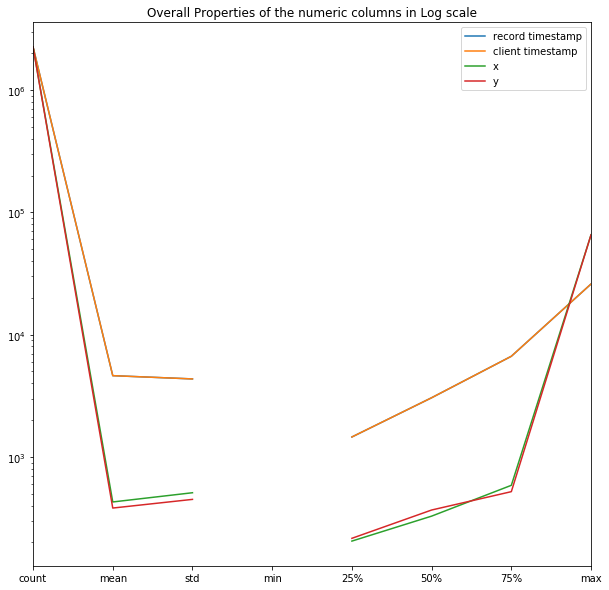

In [74]:

final_df.describe().plot(figsize=(10,10),logy=True,title='Overall Properties of the numeric columns in Log scale',
                        )

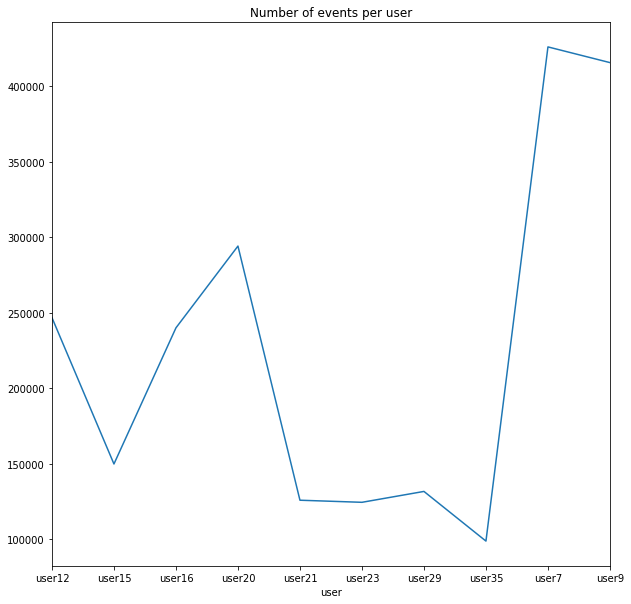

In [75]:
final_df.groupby(by='user').count()['state'].plot(title='Number of events per user',figsize=(10,10))

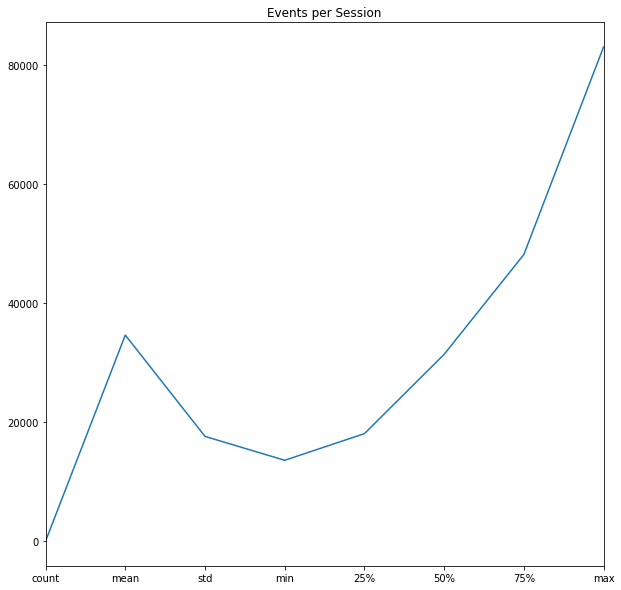

In [80]:
final_df['session'].value_counts().describe().plot(title='Events per Session',figsize=(10,10))

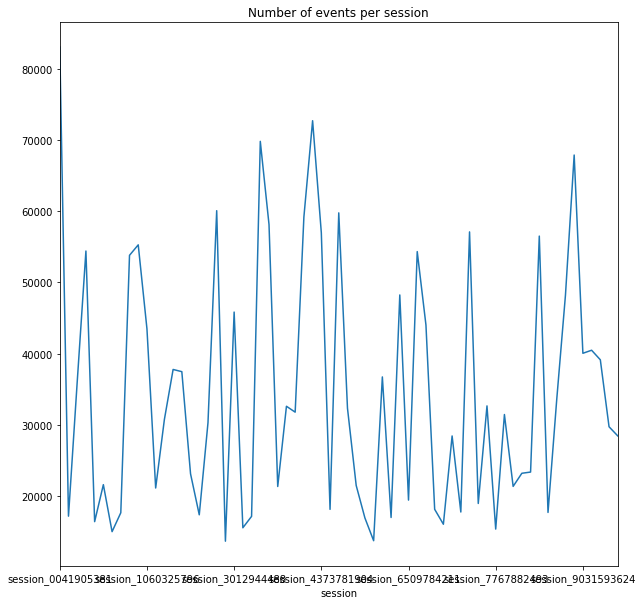

In [81]:
final_df.groupby(by='session').count()['state'].plot(title='Number of events per session',figsize=(10,10))

### Plots

#### Scatterplot

In [41]:
sample_df=final_df.groupby('user')
sample_df=sample_df.apply(lambda x: x.sample(100))

Text(0.5,1,'X-Y Position user wise')

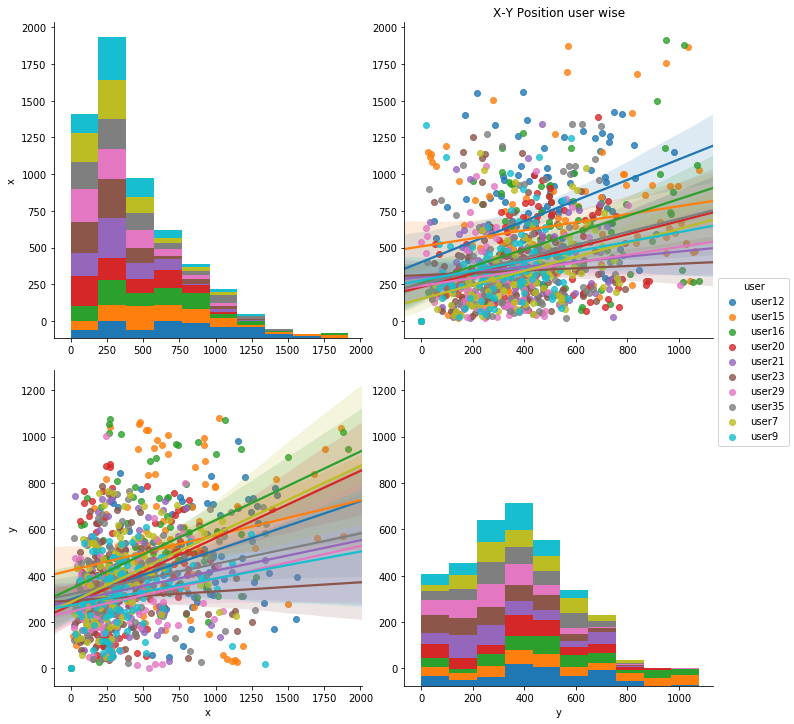

In [51]:

sns.pairplot(sample_df,hue='user',size=5,vars=['x','y'],kind='reg')
plt.title('X-Y Position user wise')

#### X and Y Heatmap

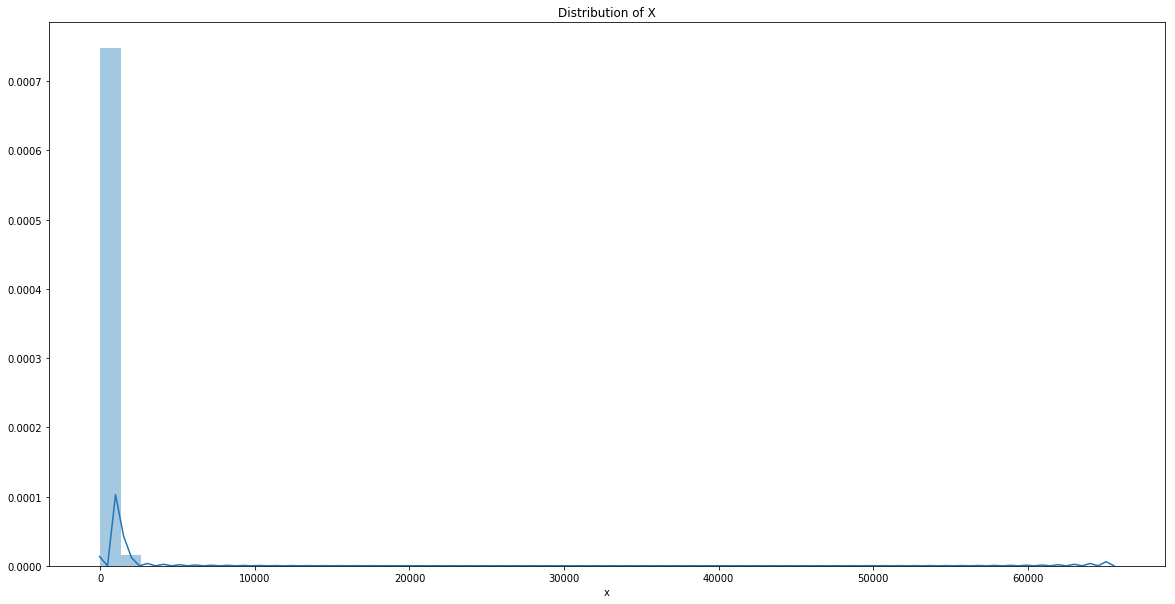

In [79]:
plt.figure(figsize=(20,10))
plt.title('Distribution of X')
sns.distplot(final_df['x'])


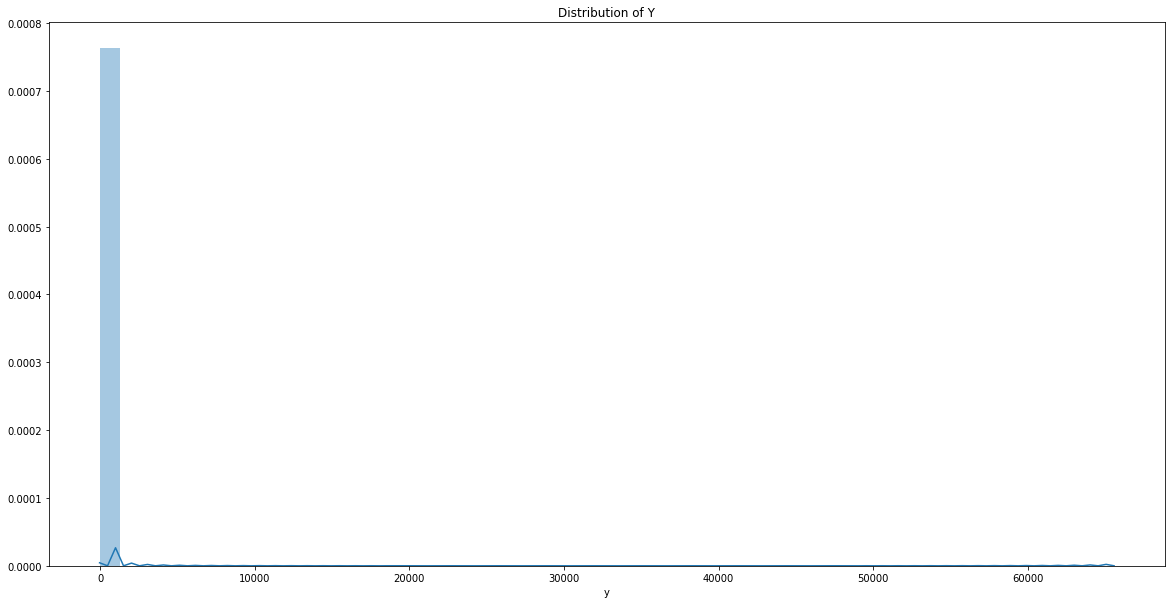

In [80]:
plt.figure(figsize=(20,10))
plt.title("Distribution of Y")
sns.distplot(final_df['y'],y)


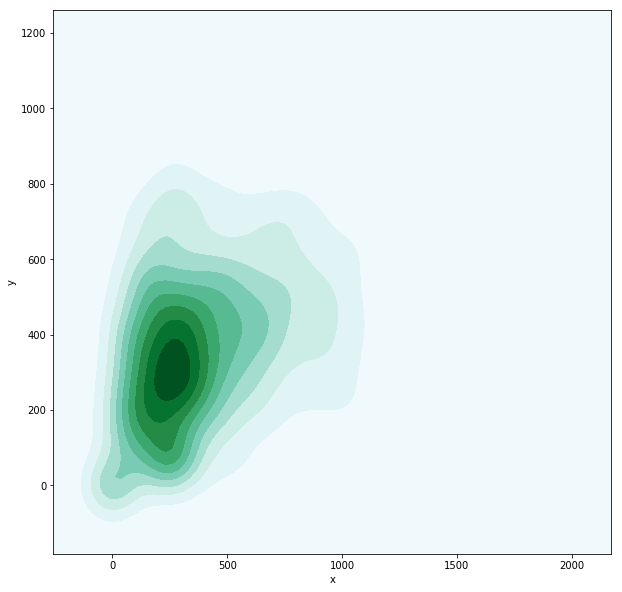

In [93]:
plt.figure(figsize=(10,10))
ax = sns.kdeplot(sample_df['x'],sample_df['y'], shade=True)

## User wise X-Y Distribution

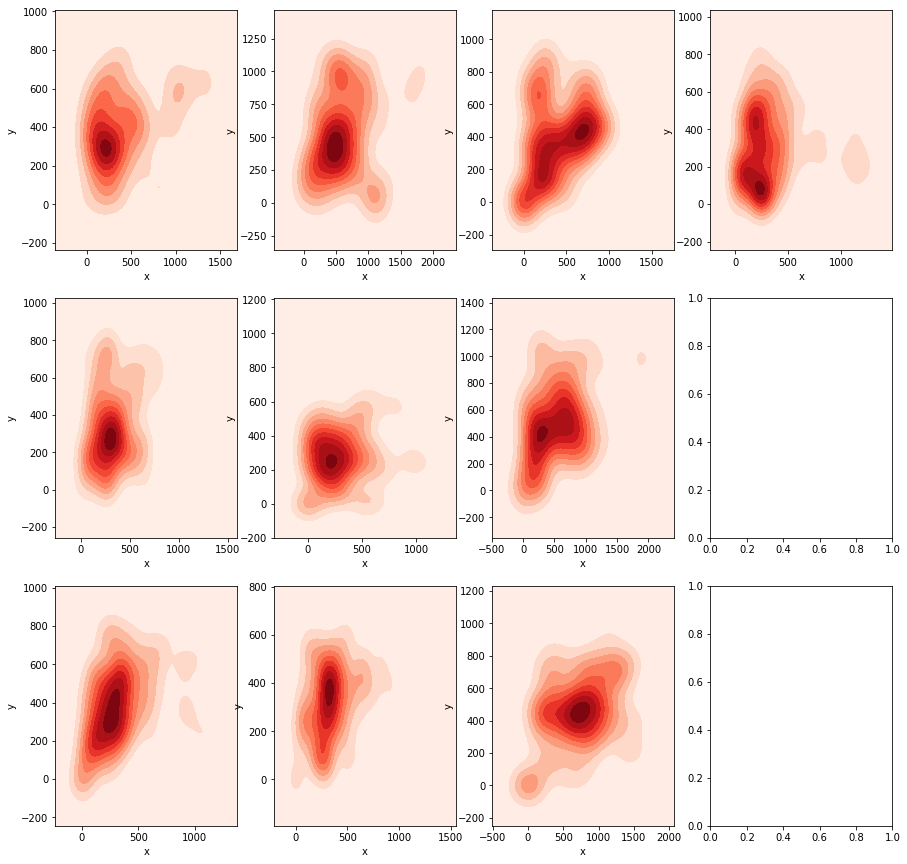

In [127]:
i=0
j=0
fig,axes=plt.subplots(int(len(user_names)/3),4,figsize=(15,15))
for u in user_names:
    udf=sample_df[sample_df['user']==os.path.basename(u)]
    if(i==3):
        j=j+1
        i=0
    sns.kdeplot(udf['x'],udf['y'], shade=True,cmap="Reds",ax=axes[i,j])
    i=i+1

Clearlt the data shows distinctive x-y movements for every user

### State wise distribution

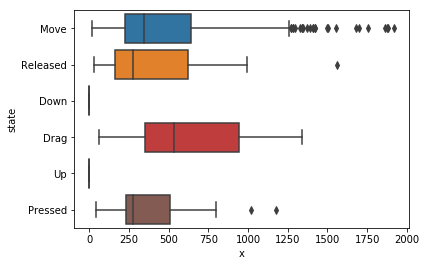

In [135]:
ax = sns.boxplot(x="x", y="state", data=sample_df)

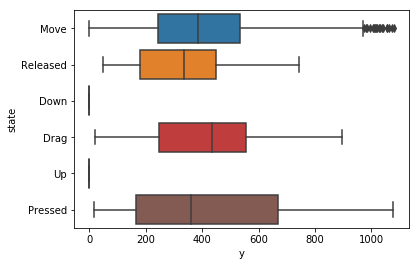

In [132]:
ax = sns.boxplot(x="y", y="state", data=sample_df)

The Above plots indicate which part of the screen is used most in each state

### State wise distribution with respect to user

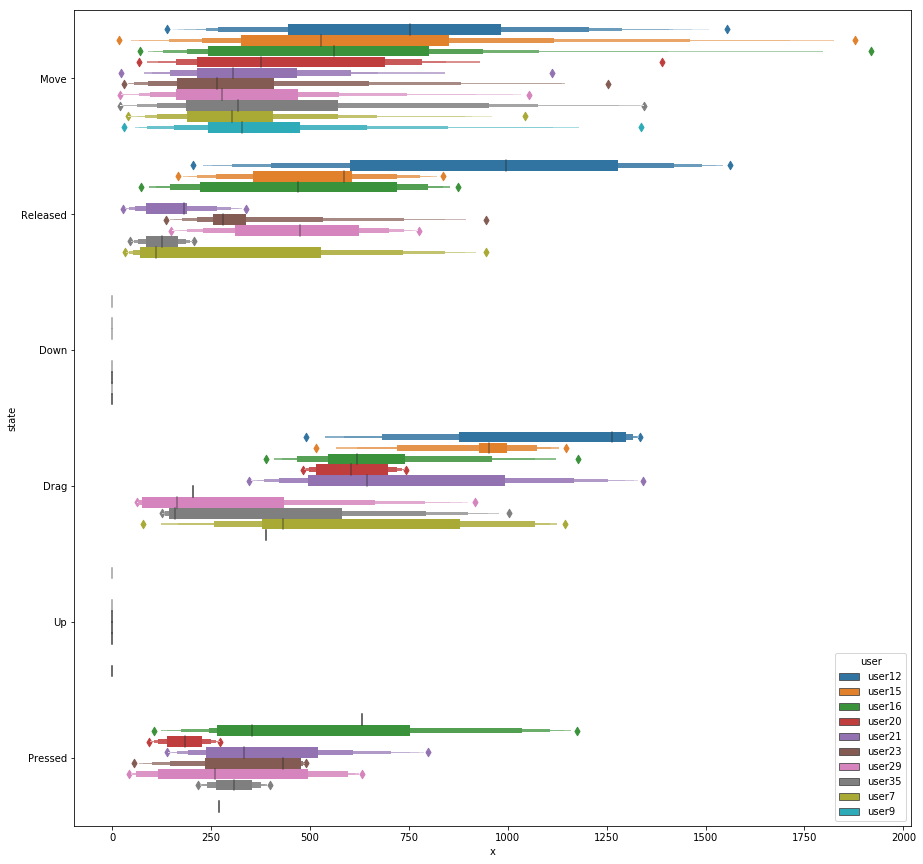

In [143]:
plt.figure(figsize=(15,15))
ax = sns.lvplot(x="x", y="state", data=sample_df,hue='user')

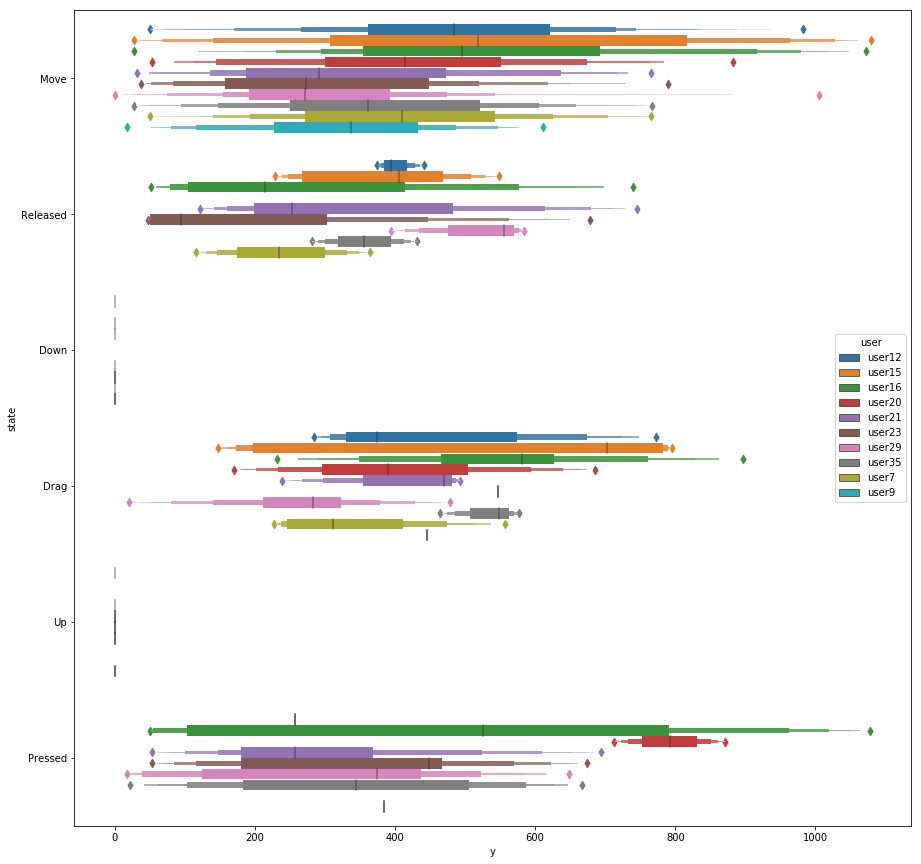

In [142]:
plt.figure(figsize=(15,15))
ax = sns.lvplot(x="y", y="state", data=sample_df,hue='user')

### Regression Line

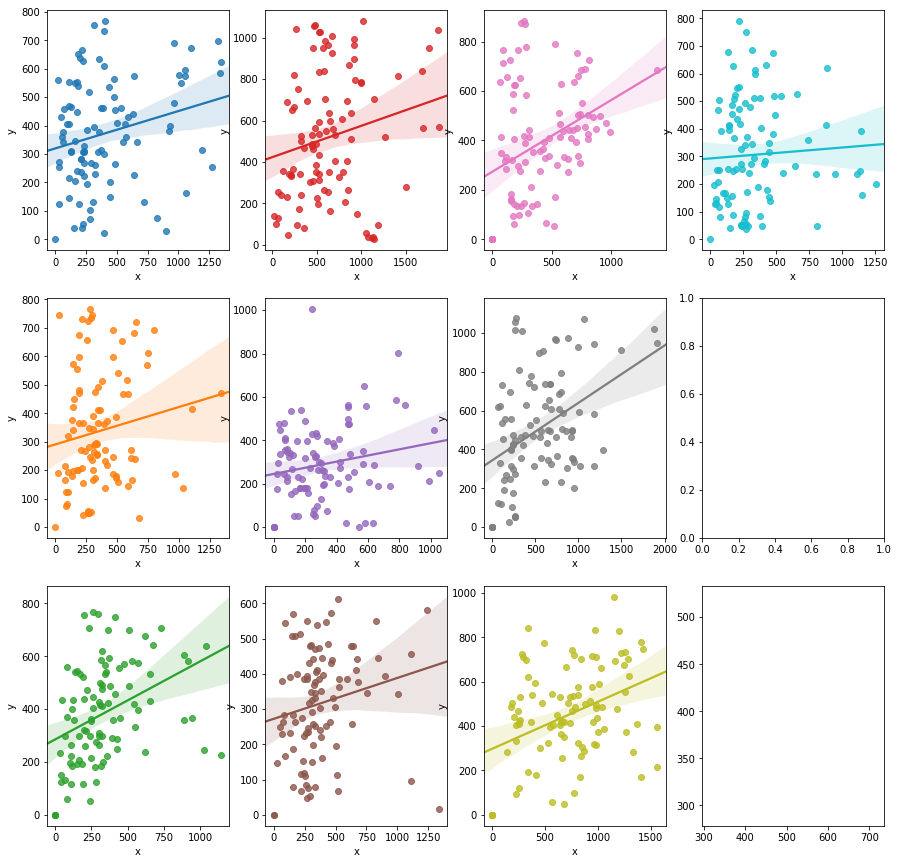

In [150]:
i=0
j=0
fig,axes=plt.subplots(int(len(user_names)/3),4,figsize=(15,15))
for u in user_names:
    udf=sample_df[sample_df['user']==os.path.basename(u)]
    if(i==3):
        j=j+1
        i=0
    sns.regplot(x='x',y='y',data=udf,ax=axes[i,j])
    i=i+1

### Plot some sample movements

In [155]:
sessions=pd.Series.unique(final_df['session'])

Seconds captured 4223.281000


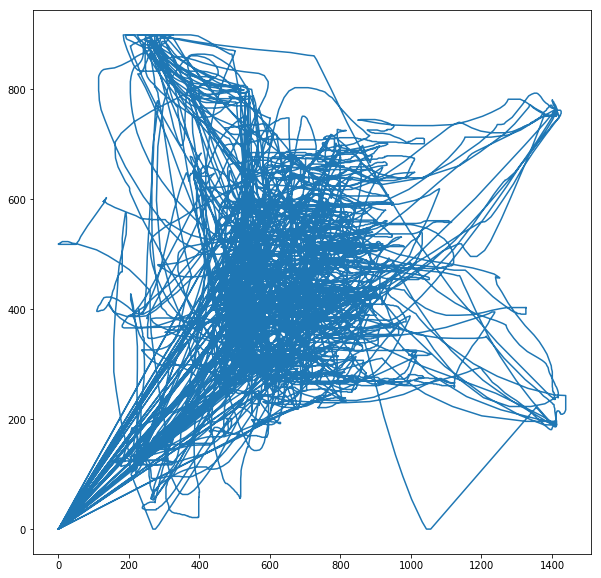

In [167]:
sess_df=final_df[final_df['session']==sessions[45]]
plt.figure(figsize=(10,10))
plt.plot(sess_df['x'],sess_df['y'])
print('Seconds captured %f'%np.max(sess_df['record timestamp']))

### Distribution of states

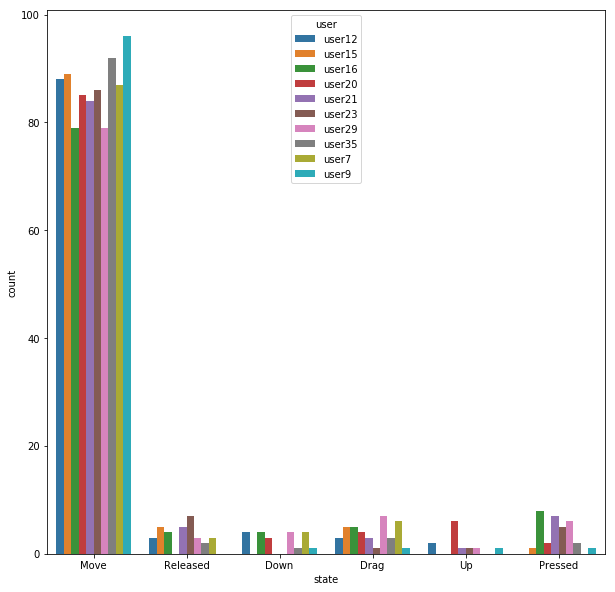

In [176]:
plt.figure(figsize=(10,10))
sns.countplot(x='state',data=sample_df,hue='user')